In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from IPython.display import display                               
from ipywidgets import interactive

%matplotlib inline

In [2]:
x = np.array([-2.5,  -2, -1.76,  -1, -0.2, 0.5, 0.8, 1.0, 1.1])
y = np.array([4.21, 2.5,  1.4, 1.37, 2.29, 2.4, 3.98, 1.2, 0.99])

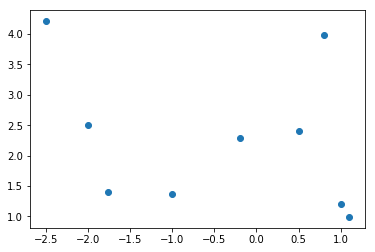

In [3]:
plt.scatter(x, y)

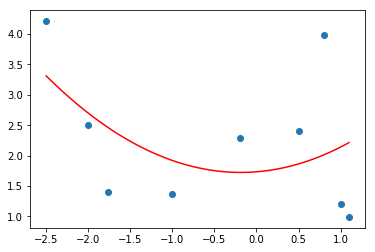

In [4]:
def regressao(tipo, grau=1, penalidade=1.0):
    if tipo == 'Linear':
        regressor = LinearRegression()
    elif tipo == 'Lasso':
        regressor = Lasso(alpha=penalidade)
    else:
        regressor = Ridge(alpha=penalidade)
    
    entradas = (x.reshape(-1, 1) ** (np.arange(grau) + 1))
    regressor.fit(entradas, y)
    
    plt.scatter(x, y)
    graphx = np.linspace(x.min(), x.max(), 100)
    graphentrada = graphx.reshape(-1, 1) ** (np.arange(grau) + 1)
    plt.plot(graphx, regressor.predict(graphentrada), c='r')

regressao('Linear', grau=2)

In [5]:
inter = interactive(regressao,
                    tipo=['Linear', 'Lasso', 'Ridge'],
                    grau=np.arange(15) + 1,
                    penalidade=(0.1, 5.0))

display(inter)

interactive(children=(Dropdown(description='tipo', options=('Linear', 'Lasso', 'Ridge'), value='Linear'), Dropdown(description='grau', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15), value=1), FloatSlider(value=1.0, description='penalidade', max=5.0, min=0.1), Output()), _dom_classes=('widget-interact',))

In [6]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import graphviz

In [7]:
wine = load_wine()
w_x = wine.data
w_y = wine.target

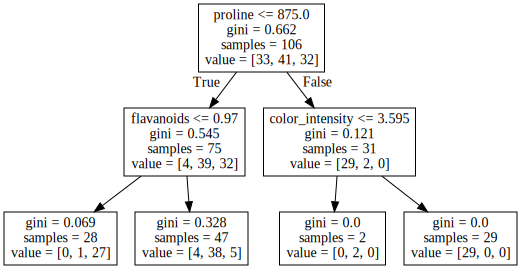

[[21  5  0]
 [ 0 30  0]
 [ 1  5 10]]


In [8]:
parte_teste = 0.4
x_treino, x_teste, y_treino, y_teste = train_test_split(w_x, w_y, test_size=parte_teste)

def arvore(altura_maxima=4):
    clf = DecisionTreeClassifier(max_depth=altura_maxima)
    clf.fit(x_treino, y_treino)
    
    source = graphviz.Source(export_graphviz(clf,
                                             out_file=None,
                                             feature_names=wine.feature_names))
    
    display(source)
    
    print(confusion_matrix(y_pred=clf.predict(x_teste), y_true=y_teste))
    
arvore(altura_maxima=2)

In [9]:
inter = interactive(arvore,
                    altura_maxima=np.arange(8) + 2)
display(inter)

interactive(children=(Dropdown(description='altura_maxima', index=2, options=(2, 3, 4, 5, 6, 7, 8, 9), value=4), Output()), _dom_classes=('widget-interact',))